## Plot remapped OTM results for an ensemble
##### This version plots 2 time periods
##### This script creates the version of the plots for the OTM application paper

In [18]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import gridspec
import os


In [19]:
# Specify runs

Cdef = 'aou'

#if Cdef == 'nitrate':

#    run0 = '../Outputs/13082024/ERA5_1990_2000_6_nitrate_ensemble_remapped.nc'
#    run1 = '../Outputs/13082024/ERA5_2000_2010_6_nitrate_ensemble_remapped.nc'
#    run2 = '../Outputs/12112024/JRA55_1990_2000_6_nitrate_ensemble_remapped.nc' # Rerun for JRA55 including freshwater run off
#    run3 = '../Outputs/12112024/JRA55_2000_2010_6_nitrate_ensemble_remapped.nc' # Rerun for JRA55 including freshwater run off
#    run4 = '../Outputs/13082024/ECCO_1990_2000_6_nitrate_ensemble_remapped.nc'
#    run5 = '../Outputs/13082024/ECCO_2000_2010_6_nitrate_ensemble_remapped.nc'

#elif Cdef == 'aou':

#    run0 = '../Outputs/20092024/ERA5_1990_2000_6_aou_ensemble_remapped.nc'
#    run1 = '../Outputs/20092024/ERA5_2000_2010_6_aou_ensemble_remapped.nc'
#    run2 = '../Outputs/10112024/JRA55_1990_2000_6_aou_ensemble_remapped.nc' # Rerun for JRA55 including freshwater run off
#    run3 = '../Outputs/10112024/JRA55_2000_2010_6_aou_ensemble_remapped.nc' # Rerun for JRA55 including freshwater run off
#    run4 = '../Outputs/20092024/ECCO_1990_2000_6_aou_ensemble_remapped.nc'
#    run5 = '../Outputs/20092024/ECCO_2000_2010_6_aou_ensemble_remapped.nc'

# New runs with new weighting and flux residual through non-outcropping water masses assigned to interior change

#if Cdef == 'nitrate':

#    run0 = '../Outputs/06012025/ERA5_1990_2000_6_nitrate_ensemble_remapped.nc'
#    run1 = '../Outputs/06012025/ERA5_2000_2010_6_nitrate_ensemble_remapped.nc'
#    run2 = '../Outputs/06012025/JRA55_1990_2000_6_nitrate_ensemble_remapped.nc'
#    run3 = '../Outputs/06012025/JRA55_2000_2010_6_nitrate_ensemble_remapped.nc'
#    run4 = '../Outputs/06012025/ECCO_1990_2000_6_nitrate_ensemble_remapped.nc'
#    run5 = '../Outputs/06012025/ECCO_2000_2010_6_nitrate_ensemble_remapped.nc'

#elif Cdef == 'aou':

#    run0 = '../Outputs/06012025/ERA5_1990_2000_6_aou_ensemble_remapped.nc'
#    run1 = '../Outputs/06012025/ERA5_2000_2010_6_aou_ensemble_remapped.nc'
#    run2 = '../Outputs/06012025/JRA55_1990_2000_6_aou_ensemble_remapped.nc'
#    run3 = '../Outputs/06012025/JRA55_2000_2010_6_aou_ensemble_remapped.nc'
#    run4 = '../Outputs/06012025/ECCO_1990_2000_6_aou_ensemble_remapped.nc'
#    run5 = '../Outputs/06012025/ECCO_2000_2010_6_aou_ensemble_remapped.nc'

# New runs with Seaflux prior from mean of wind products

if Cdef == 'nitrate':

    run0 = '../Outputs/18012025/ERA5_1990_2000_6_nitrate_ensemble_remapped.nc'
    run1 = '../Outputs/18012025/ERA5_2000_2010_6_nitrate_ensemble_remapped.nc'
    run2 = '../Outputs/18012025/JRA55_1990_2000_6_nitrate_ensemble_remapped.nc'
    run3 = '../Outputs/18012025/JRA55_2000_2010_6_nitrate_ensemble_remapped.nc'
    run4 = '../Outputs/18012025/ECCO_1990_2000_6_nitrate_ensemble_remapped.nc'
    run5 = '../Outputs/18012025/ECCO_2000_2010_6_nitrate_ensemble_remapped.nc'

elif Cdef == 'aou':

    run0 = '../Outputs/17012025/ERA5_1990_2000_6_aou_ensemble_remapped.nc'
    run1 = '../Outputs/17012025/ERA5_2000_2010_6_aou_ensemble_remapped.nc'
    run2 = '../Outputs/17012025/JRA55_1990_2000_6_aou_ensemble_remapped.nc'
    run3 = '../Outputs/17012025/JRA55_2000_2010_6_aou_ensemble_remapped.nc'
    run4 = '../Outputs/17012025/ECCO_1990_2000_6_aou_ensemble_remapped.nc'
    run5 = '../Outputs/17012025/ECCO_2000_2010_6_aou_ensemble_remapped.nc'

run4 = 'test'
run5 = 'test'


init_early_p1 = int(run0[25:29])
init_late_p1 = int(run0[30:34])
len_p1 = int(run0[35])
init_early_p2 = int(run1[25:29])
init_late_p2 = int(run1[30:34])
len_p2 = int(run1[35])

mid_early_p1 = str(init_early_p1 + len_p1/2)[0:4]
mid_late_p1 = str(init_late_p1 +len_p1/2)[0:4]
mid_early_p2 = str(init_early_p2 + len_p2/2)[0:4]
mid_late_p2 = str(init_late_p2 +len_p2/2)[0:4]

print(mid_early_p1)
print(mid_late_p1)
print(mid_early_p2)
print(mid_late_p2)


1993
2003
2003
2013


In [20]:
# Load remapped runs and calculate mean of terms for each time period

numruns = 6

dC_adj_remapped_all = np.zeros((42,173,360,numruns))
dC_mix_remapped_all = np.zeros((42,173,360,numruns))
dC_prior_remapped_all = np.zeros((42,173,360,numruns))
dC_change_remapped_all = np.zeros((42,173,360,numruns))
dC_OTM_remapped_all = np.zeros((42,173,360,numruns))

dC_adj_remapped_all[:] = np.nan
dC_mix_remapped_all[:] = np.nan
dC_prior_remapped_all[:] = np.nan
dC_change_remapped_all[:] = np.nan
dC_OTM_remapped_all[:] = np.nan

for run in np.arange(0,numruns):

    exec('runname = run' + str(run))

    if os.path.isfile(runname) == False:
        print('Run ' + runname + ' does not exist')

    if os.path.isfile(runname):

        OTM_remapped = xr.open_mfdataset(runname)
    
        dC_adj_remapped_all[:,:,:,run] = OTM_remapped.dC_adj_remapped
        dC_mix_remapped_all[:,:,:,run] = OTM_remapped.dC_mix_remapped
        dC_prior_remapped_all[:,:,:,run] = OTM_remapped.dC_prior_remapped
        dC_change_remapped_all[:,:,:,run] = OTM_remapped.dC_change_remapped
        dC_OTM_remapped_all[:,:,:,run] = OTM_remapped.dC_OTM_remapped

dC_adj_remapped_p1 = xr.DataArray(np.nanmean(dC_adj_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_adj_remapped.dims, coords=OTM_remapped.dC_adj_remapped.coords)
dC_adj_remapped_p2 = xr.DataArray(np.nanmean(dC_adj_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_adj_remapped.dims, coords=OTM_remapped.dC_adj_remapped.coords)

dC_mix_remapped_p1 = xr.DataArray(np.nanmean(dC_mix_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_mix_remapped.dims, coords=OTM_remapped.dC_mix_remapped.coords)
dC_mix_remapped_p2 = xr.DataArray(np.nanmean(dC_mix_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_mix_remapped.dims, coords=OTM_remapped.dC_mix_remapped.coords)

dC_prior_remapped_p1 = xr.DataArray(np.nanmean(dC_prior_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_prior_remapped.dims, coords=OTM_remapped.dC_prior_remapped.coords)
dC_prior_remapped_p2 = xr.DataArray(np.nanmean(dC_prior_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_prior_remapped.dims, coords=OTM_remapped.dC_prior_remapped.coords)

dC_change_remapped_p1 = xr.DataArray(np.nanmean(dC_change_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_change_remapped.dims, coords=OTM_remapped.dC_change_remapped.coords)
dC_change_remapped_p2 = xr.DataArray(np.nanmean(dC_change_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_change_remapped.dims, coords=OTM_remapped.dC_change_remapped.coords)

dC_OTM_remapped_p1 = xr.DataArray(np.nanmean(dC_OTM_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_OTM_remapped.dims, coords=OTM_remapped.dC_OTM_remapped.coords)
dC_OTM_remapped_p2 = xr.DataArray(np.nanmean(dC_OTM_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_OTM_remapped.dims, coords=OTM_remapped.dC_OTM_remapped.coords)


# Calculate standard deviations of terms for each time period

dC_adj_remapped_std_p1 = xr.DataArray(np.nanstd(dC_adj_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_adj_remapped.dims, coords=OTM_remapped.dC_adj_remapped.coords)
dC_adj_remapped_std_p2 = xr.DataArray(np.nanstd(dC_adj_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_adj_remapped.dims, coords=OTM_remapped.dC_adj_remapped.coords)

dC_mix_remapped_std_p1 = xr.DataArray(np.nanstd(dC_mix_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_mix_remapped.dims, coords=OTM_remapped.dC_mix_remapped.coords)
dC_mix_remapped_std_p2 = xr.DataArray(np.nanstd(dC_mix_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_mix_remapped.dims, coords=OTM_remapped.dC_mix_remapped.coords)

dC_prior_remapped_std_p1 = xr.DataArray(np.nanstd(dC_prior_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_prior_remapped.dims, coords=OTM_remapped.dC_prior_remapped.coords)
dC_prior_remapped_std_p2 = xr.DataArray(np.nanstd(dC_prior_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_prior_remapped.dims, coords=OTM_remapped.dC_prior_remapped.coords)

dC_change_remapped_std_p1 = xr.DataArray(np.nanstd(dC_change_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_change_remapped.dims, coords=OTM_remapped.dC_change_remapped.coords)
dC_change_remapped_std_p2 = xr.DataArray(np.nanstd(dC_change_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_change_remapped.dims, coords=OTM_remapped.dC_change_remapped.coords)

dC_OTM_remapped_std_p1 = xr.DataArray(np.nanstd(dC_OTM_remapped_all[:,:,:,(0,2,4)],axis=3),dims=OTM_remapped.dC_OTM_remapped.dims, coords=OTM_remapped.dC_OTM_remapped.coords)
dC_OTM_remapped_std_p2 = xr.DataArray(np.nanstd(dC_OTM_remapped_all[:,:,:,(1,3,5)],axis=3),dims=OTM_remapped.dC_OTM_remapped.dims, coords=OTM_remapped.dC_OTM_remapped.coords)



Run test does not exist
Run test does not exist


In [21]:
# Calculate fluxes and their errors for each run

aps=2

OTM_flux_int_all = np.zeros((173,360,aps))
prior_flux_int_all = np.zeros((173,360,aps))
OTM_flux_int_err_all = np.zeros((173,360,aps))
prior_flux_int_err_all = np.zeros((173,360,aps))

adj_rate_all = np.zeros((42,173,360,aps))
mix_rate_all = np.zeros((42,173,360,aps))
prior_rate_all = np.zeros((42,173,360,aps))
OTM_rate_all = np.zeros((42,173,360,aps))
adj_rate_err_all = np.zeros((42,173,360,aps))
mix_rate_err_all = np.zeros((42,173,360,aps))
prior_rate_err_all = np.zeros((42,173,360,aps))
OTM_rate_err_all = np.zeros((42,173,360,aps))

for ap in np.arange(0,aps):

    exec('dC_adj_remapped=dC_adj_remapped_p' + str(ap+1))
    exec('dC_prior_remapped=dC_prior_remapped_p' + str(ap+1))
    exec('dC_mix_remapped=dC_mix_remapped_p' + str(ap+1))
    exec('dC_OTM_remapped=dC_OTM_remapped_p' + str(ap+1))

    exec('dC_adj_remapped_std=dC_adj_remapped_std_p' + str(ap+1))
    exec('dC_prior_remapped_std=dC_prior_remapped_std_p' + str(ap+1))
    exec('dC_mix_remapped_std=dC_mix_remapped_std_p' + str(ap+1))
    exec('dC_OTM_remapped_std=dC_OTM_remapped_std_p' + str(ap+1))
    

    exec('runname = run' + str(ap))
    OTM_remapped = xr.open_mfdataset(runname) # Just for dz, init_early and init_late

    # Depth integrated fluxes

    dC_adj_int=(dC_adj_remapped*OTM_remapped.dz).sum('depth')
    dC_prior_int=(dC_prior_remapped*OTM_remapped.dz).sum('depth')
    dC_OTM_int=(dC_OTM_remapped*OTM_remapped.dz).sum('depth')
    
    dC_adj_int_err=(dC_adj_remapped_std*OTM_remapped.dz).sum('depth')
    dC_prior_int_err=(dC_prior_remapped_std*OTM_remapped.dz).sum('depth')
    dC_OTM_int_err=(dC_OTM_remapped_std*OTM_remapped.dz).sum('depth')


    #dC_OTM_flux=(dC_prior_int + dC_adj_int)/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
    dC_OTM_flux=(dC_OTM_int)/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr      
    dC_prior_flux=dC_prior_int/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
    
    #dC_OTM_flux_err=(dC_prior_int_err + dC_adj_int_err)/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
    dC_OTM_flux_err=(dC_OTM_int_err)/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr   
    dC_prior_flux_err=dC_prior_int_err/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)*10**3) # mol-C/m^2/yr
   

    OTM_flux_int_all[:,:,ap] = dC_OTM_flux
    prior_flux_int_all[:,:,ap] = dC_prior_flux
    OTM_flux_int_err_all[:,:,ap] = dC_OTM_flux_err
    prior_flux_int_err_all[:,:,ap] = dC_prior_flux_err

    # 3D rates of change

    adj_rate_all[:,:,:,ap] = dC_adj_remapped/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr
    mix_rate_all[:,:,:,ap] = dC_mix_remapped/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr
    prior_rate_all[:,:,:,ap] = dC_prior_remapped/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr
    OTM_rate_all[:,:,:,ap] = dC_OTM_remapped/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr
    
    adj_rate_err_all[:,:,:,ap] = dC_adj_remapped_std/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr
    mix_rate_err_all[:,:,:,ap] = dC_mix_remapped_std/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr
    prior_rate_err_all[:,:,:,ap] = dC_prior_remapped_std/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr
    OTM_rate_err_all[:,:,:,ap] = dC_OTM_remapped_std/((OTM_remapped.init_late.values-OTM_remapped.init_early.values)) # mmol-C/m^3/yr


(LON,LAT)=np.meshgrid(OTM_remapped.lon.values,OTM_remapped.lat.values)

In [22]:
# Calculate interior budget terms

adj_p1 = adj_rate_all[:,:,:,0]
adj_p2 = adj_rate_all[:,:,:,1]

mix_p1 = mix_rate_all[:,:,:,0]
mix_p2 = mix_rate_all[:,:,:,1]

prior_p1 = prior_rate_all[:,:,:,0]
prior_p2 = prior_rate_all[:,:,:,1]

OTM_p1 = OTM_rate_all[:,:,:,0]
OTM_p2 = OTM_rate_all[:,:,:,1]

In [23]:
# Calculate flux trends

OTM_flux_trend_p1p2 = (OTM_flux_int_all[:,:,1] - OTM_flux_int_all[:,:,0])/(init_early_p2-init_early_p1)*10
prior_flux_trend_p1p2 = (prior_flux_int_all[:,:,1] - prior_flux_int_all[:,:,0])/(init_early_p2-init_early_p1)*10

# Calculate interior trends

adj_trend_p1p2 = (adj_rate_all[:,:,:,1] - adj_rate_all[:,:,:,0])/(init_early_p2-init_early_p1)*10
mix_trend_p1p2 = (mix_rate_all[:,:,:,1] - mix_rate_all[:,:,:,0])/(init_early_p2-init_early_p1)*10
prior_trend_p1p2 = (prior_rate_all[:,:,:,1] - prior_rate_all[:,:,:,0])/(init_early_p2-init_early_p1)*10
OTM_trend_p1p2 = (OTM_rate_all[:,:,:,1] - OTM_rate_all[:,:,:,0])/(init_early_p2-init_early_p1)*10

# Calculate flux trend errors

OTM_flux_trend_err_p1p2 = OTM_flux_int_err_all[:,:,1] + OTM_flux_int_err_all[:,:,0]
prior_flux_trend_err_p1p2 = prior_flux_int_err_all[:,:,1] + prior_flux_int_err_all[:,:,0]

# Calculate interior trend errors

adj_trend_err_p1p2 = adj_rate_err_all[:,:,:,1] + adj_rate_err_all[:,:,:,0]
mix_trend_err_p1p2 = mix_rate_err_all[:,:,:,1] + mix_rate_err_all[:,:,:,0]
prior_trend_err_p1p2 = prior_rate_err_all[:,:,:,1] + prior_rate_err_all[:,:,:,0]

# Zero out anywhere in the OTM solutions where fluxes were zero (this is to avoid introducing errors to the trends where outcrops move between time periods)

OTM_flux_trend_p1p2[OTM_flux_int_all[:,:,1]==0] = 0
OTM_flux_trend_p1p2[OTM_flux_int_all[:,:,0]==0] = 0
OTM_trend_p1p2[OTM_rate_all[:,:,:,1]==0] = 0
OTM_trend_p1p2[OTM_rate_all[:,:,:,0]==0] = 0


#### Plot fluxes and trends

Text(0.5, 1.0, 'Prior trend 1993-2003 to 2003-2013')

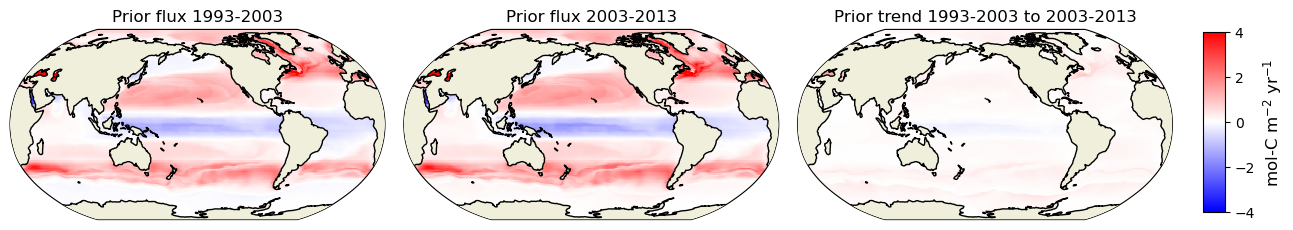

In [24]:
# Plot prior fluxes and trends global

fig  = plt.figure(figsize = (15, 6))
gs = gridspec.GridSpec(1,3)
gs.update(wspace = 0.05, hspace=0.05)
fs=12

minv, maxv = -4,4

ax1 = plt.subplot(gs[0], projection=ccrs.Robinson(central_longitude=-160))
ax2 = plt.subplot(gs[1], projection=ccrs.Robinson(central_longitude=-160))
ax3 = plt.subplot(gs[2], projection=ccrs.Robinson(central_longitude=-160))


cax = fig.add_axes([0.92, 0.35, 0.015, 0.3])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)

# P1

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, prior_flux_int_all[:,:,0], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('Prior flux ' + mid_early_p1 + '-' + mid_late_p1,fontsize=fs)

# P2

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, prior_flux_int_all[:,:,1], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('Prior flux ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)

# P1-P2 trend

ax3.stock_img()
ax3.coastlines(zorder=101)
ax3.pcolormesh(LON, LAT, prior_flux_trend_p1p2, transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax3.add_feature(cfeature.LAND, zorder=100)
ax3.set_title('Prior trend ' + mid_early_p1 + '-' + mid_late_p1 + ' to ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)


Text(0.5, 1.0, 'OTM trend 1993-2003 to 2003-2013')

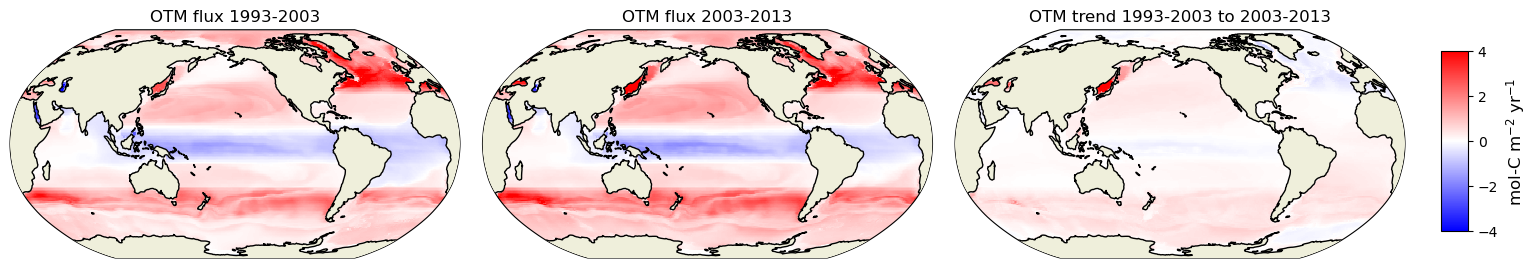

In [25]:
# Plot OTM fluxes and trends global

fig  = plt.figure(figsize = (18, 6))
gs = gridspec.GridSpec(1,3)
gs.update(wspace = 0.05, hspace=0.05)
fs=12

minv, maxv = -4,4

ax1 = plt.subplot(gs[0], projection=ccrs.Robinson(central_longitude=-160))
ax2 = plt.subplot(gs[1], projection=ccrs.Robinson(central_longitude=-160))
ax3 = plt.subplot(gs[2], projection=ccrs.Robinson(central_longitude=-160))


cax = fig.add_axes([0.92, 0.35, 0.015, 0.3])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)

# P1

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, OTM_flux_int_all[:,:,0], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('OTM flux ' + mid_early_p1 + '-' + mid_late_p1,fontsize=fs)

# P2

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, OTM_flux_int_all[:,:,1], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('OTM flux ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)

# P1-P2 trend

ax3.stock_img()
ax3.coastlines(zorder=101)
ax3.pcolormesh(LON, LAT, OTM_flux_trend_p1p2, transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax3.add_feature(cfeature.LAND, zorder=100)
ax3.set_title('OTM trend ' + mid_early_p1 + '-' + mid_late_p1 + ' to ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)


Text(0.5, 1.0, 'OTM flux uncertainty 2003-2013')

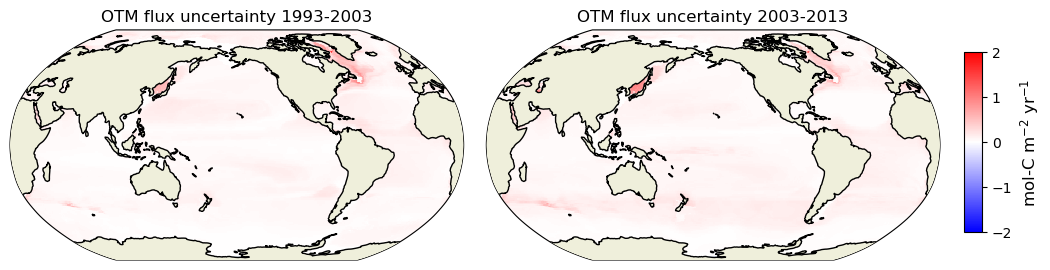

In [26]:
# Plot OTM flux uncertainty global

fig  = plt.figure(figsize = (12, 6))
gs = gridspec.GridSpec(1,2)
gs.update(wspace = 0.05, hspace=0.05)
fs=12

minv, maxv = -2,2

ax1 = plt.subplot(gs[0], projection=ccrs.Robinson(central_longitude=-160))
ax2 = plt.subplot(gs[1], projection=ccrs.Robinson(central_longitude=-160))

cax = fig.add_axes([0.92, 0.35, 0.015, 0.3])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)

# P1

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, OTM_flux_int_err_all[:,:,0], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('OTM flux uncertainty ' + mid_early_p1 + '-' + mid_late_p1,fontsize=fs)

# P2

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, OTM_flux_int_err_all[:,:,1], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('OTM flux uncertainty ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)



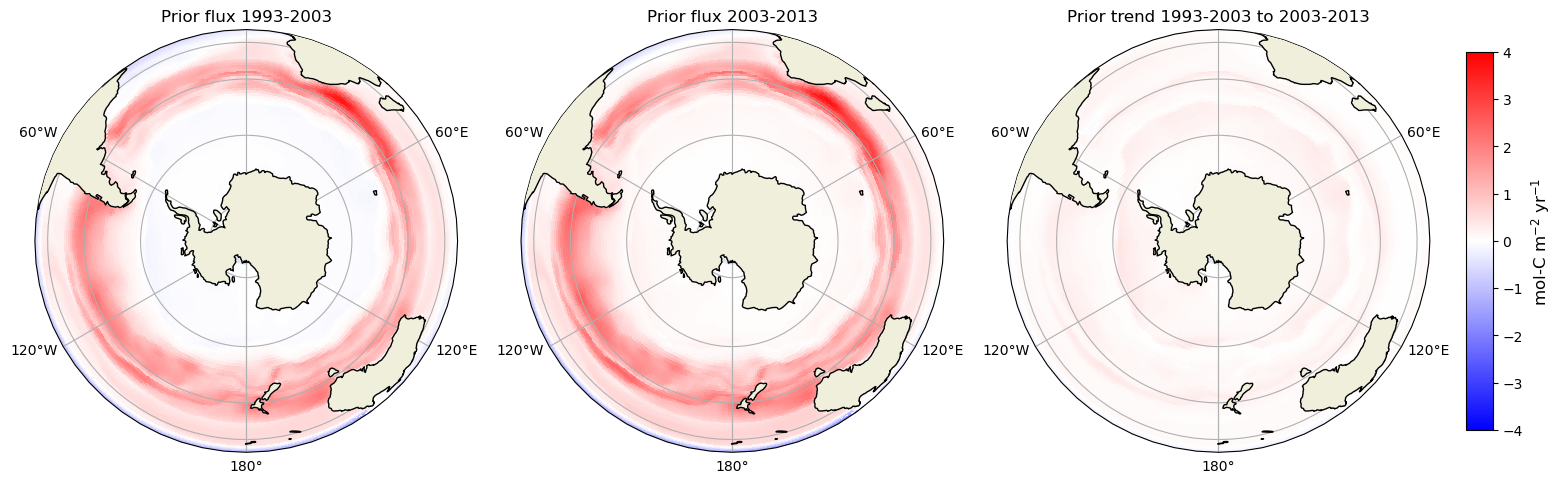

In [27]:
# Plot prior fluxes and trends Southern Ocean

fig  = plt.figure(figsize = (18, 6))
gs = gridspec.GridSpec(1,3)
gs.update(wspace = 0.15, hspace=0.05)
fs=12

minv, maxv = -4,4

ax1 = plt.subplot(gs[0], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax2 = plt.subplot(gs[1], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax3 = plt.subplot(gs[2], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))


cax = fig.add_axes([0.92, 0.18, 0.015, 0.63])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)

# P1

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, prior_flux_int_all[:,:,0], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('Prior flux ' + mid_early_p1 + '-' + mid_late_p1,fontsize=fs)

# P2

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, prior_flux_int_all[:,:,1], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('Prior flux ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)

# P1-P2

ax3.stock_img()
ax3.coastlines(zorder=101)
ax3.pcolormesh(LON, LAT, prior_flux_trend_p1p2, transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax3.add_feature(cfeature.LAND, zorder=100)
ax3.set_title('Prior trend ' + mid_early_p1 + '-' + mid_late_p1 + ' to ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)


# Add gridlines
gl1 = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl1.top_labels = False
gl1.right_labels = False

gl2 = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl2.top_labels = False
gl2.right_labels = False

gl3 = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl3.top_labels = False
gl3.right_labels = False


plt.show()



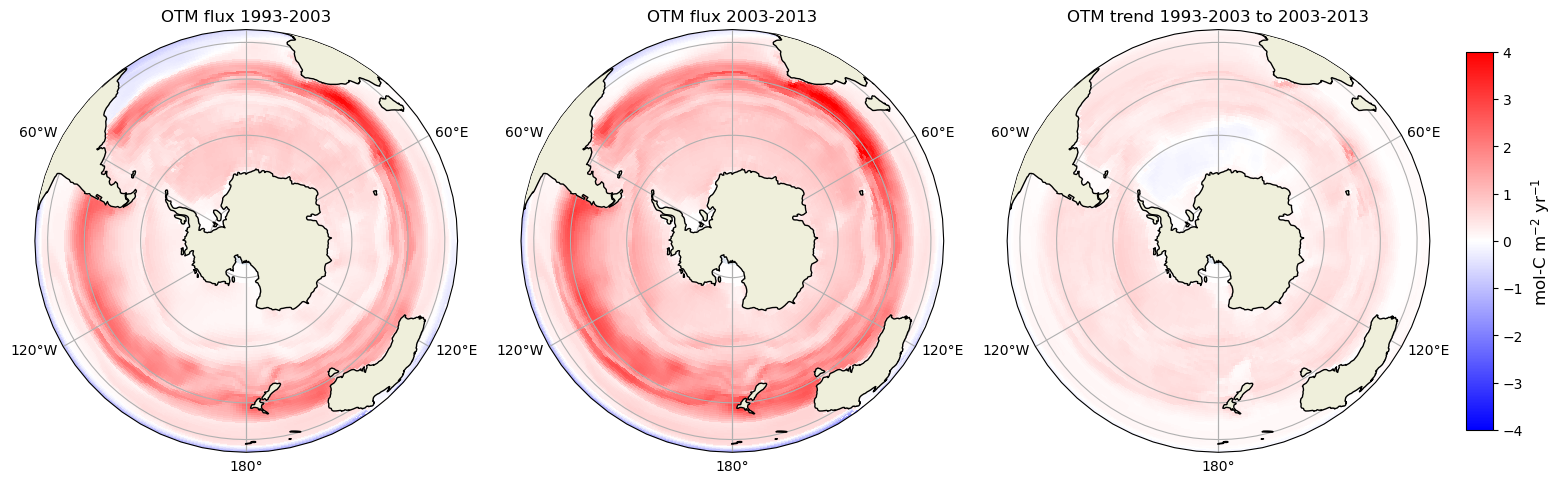

In [28]:
# Plot OTM fluxes Southern Ocean

fig  = plt.figure(figsize = (18, 6))
gs = gridspec.GridSpec(1,3)
gs.update(wspace = 0.15, hspace=0.05)
fs=12

minv, maxv = -4,4

ax1 = plt.subplot(gs[0], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax2 = plt.subplot(gs[1], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax3 = plt.subplot(gs[2], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))


cax = fig.add_axes([0.92, 0.18, 0.015, 0.63])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)

# P1

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, OTM_flux_int_all[:,:,0], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('OTM flux ' + mid_early_p1 + '-' + mid_late_p1,fontsize=fs)

# P2

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, OTM_flux_int_all[:,:,1], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('OTM flux ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)

# P1-P2

ax3.stock_img()
ax3.coastlines(zorder=101)
ax3.pcolormesh(LON, LAT, OTM_flux_trend_p1p2, transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax3.add_feature(cfeature.LAND, zorder=100)
ax3.set_title('OTM trend ' + mid_early_p1 + '-' + mid_late_p1 + ' to ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)


# Add gridlines
gl1 = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl1.top_labels = False
gl1.right_labels = False

gl2 = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl2.top_labels = False
gl2.right_labels = False

gl3 = ax3.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl3.top_labels = False
gl3.right_labels = False


plt.show()



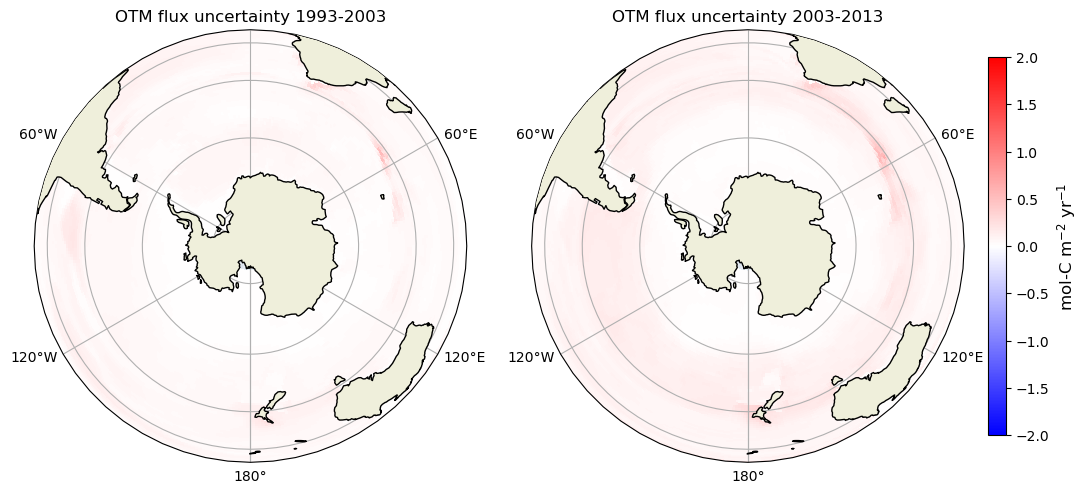

In [29]:
# Plot OTM flux uncertainty Southern Ocean

fig  = plt.figure(figsize = (12, 6))
gs = gridspec.GridSpec(1,2)
gs.update(wspace = 0.15, hspace=0.05)
fs=12

minv, maxv = -2,2

ax1 = plt.subplot(gs[0], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))
ax2 = plt.subplot(gs[1], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90))

cax = fig.add_axes([0.92, 0.18, 0.015, 0.63])
m = plt.cm.ScalarMappable(cmap='bwr')
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='vertical')
cbar.set_label('mol-C m$^{-2}$ yr$^{-1}$',fontsize=fs)

# P1

ax1.stock_img()
ax1.coastlines(zorder=101)
ax1.pcolormesh(LON, LAT, OTM_flux_int_err_all[:,:,0], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax1.add_feature(cfeature.LAND, zorder=100)
ax1.set_title('OTM flux uncertainty ' + mid_early_p1 + '-' + mid_late_p1,fontsize=fs)

# P2

ax2.stock_img()
ax2.coastlines(zorder=101)
ax2.pcolormesh(LON, LAT, OTM_flux_int_err_all[:,:,1], transform = ccrs.PlateCarree(), vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
ax2.add_feature(cfeature.LAND, zorder=100)
ax2.set_title('OTM flux uncertainty ' + mid_early_p2 + '-' + mid_late_p2,fontsize=fs)



# Add gridlines
gl1 = ax1.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl1.top_labels = False
gl1.right_labels = False

gl2 = ax2.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl2.top_labels = False
gl2.right_labels = False



plt.show()



### Zonal mean sections

In [30]:
## Define basin masks

mask = xr.open_mfdataset('/home/users/nmackay/MTM/mask_EN4.nc')

(LON2,LAT2)=np.meshgrid(mask.lon.values,mask.lat.values)

# Atlantic

mask_2D=mask.mask_EN4.isel(depth=0,Basins=[0,1,2,3,8])
mask_2D[4,:,:]=xr.where(np.logical_or(LON2>=290,LON2<=25),mask_2D[4,:,:],0)

mask_ATL=mask_2D.sum('Basins').expand_dims(dim={'depth': mask.depth},axis=0)
mask_ATL=xr.where(mask_ATL==0,np.nan,1)

# Pacific

mask_2D=mask.mask_EN4.isel(depth=0,Basins=[5,6,7,8])
mask_2D[3,:,:]=xr.where(np.logical_and(LON2<290,LON2>140),mask_2D[3,:,:],0)

mask_PAC=mask_2D.sum('Basins').expand_dims(dim={'depth': mask.depth},axis=0)
mask_PAC=xr.where(mask_PAC==0,np.nan,1)

# IndoPacific

mask_2D=mask.mask_EN4.isel(depth=0,Basins=[4,5,6,7,8])
mask_2D[3,:,:]=xr.where(np.logical_and(LON2<290,LON2>25),mask_2D[3,:,:],0)

mask_INDPAC=mask_2D.sum('Basins').expand_dims(dim={'depth': mask.depth},axis=0)
mask_INDPAC=xr.where(mask_INDPAC==0,np.nan,1)

# Replace land with nan in OTM outputs

land_mask = xr.open_mfdataset('../WM_Methods/land_mask_EN4.nc').__xarray_dataarray_variable__

adj_p1 = xr.where(land_mask==1,adj_p1,np.nan)
adj_p2 = xr.where(land_mask==1,adj_p2,np.nan)

mix_p1 = xr.where(land_mask==1,mix_p1,np.nan)
mix_p2 = xr.where(land_mask==1,mix_p2,np.nan)

prior_p1 = xr.where(land_mask==1,prior_p1,np.nan)
prior_p2 = xr.where(land_mask==1,prior_p2,np.nan)

OTM_p1 = xr.where(land_mask==1,OTM_p1,np.nan)
OTM_p2 = xr.where(land_mask==1,OTM_p2,np.nan)

adj_trend_p1p2 = xr.where(land_mask==1,adj_trend_p1p2,np.nan)
mix_trend_p1p2 = xr.where(land_mask==1,mix_trend_p1p2,np.nan)
prior_trend_p1p2 = xr.where(land_mask==1,prior_trend_p1p2,np.nan)
OTM_trend_p1p2 = xr.where(land_mask==1,OTM_trend_p1p2,np.nan)

# Load density data (calculated by calc_density_field.ipynb)

density = xr.open_dataset('/home/users/nmackay/MTM/Density/sigma0_EN4_1990_2015.nc').density
#density = xr.open_dataset('/home/users/nmackay/MTM/Density/rho_EN4_1990_2015.nc').density

density = xr.where(land_mask==1,density,np.nan)

# Load temperature and salinity data

EN4_data = xr.open_mfdataset('/home/users/nmackay/unicorns/EN4_for_OTM/EN.4.2.2.f.analysis.g10.*.nc')

T = EN4_data.temperature.sel(time=slice('1990-01-01','2015-12-31')).mean('time')-273.15
S = EN4_data.salinity.sel(time=slice('1990-01-01','2015-12-31')).mean('time')



/tmp/ipykernel_3513/3426805081.py:24: RuntimeWarning: Mean of empty slice
  axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p1)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3426805081.py:32: RuntimeWarning: Mean of empty slice
  axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3426805081.py:41: RuntimeWarning: Mean of empty slice
  axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p1*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3426805081.py:48: RuntimeWarning: Mean of empty slice
  axes[1,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p2*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3426805081.py:57: RuntimeWarning: Mean of empty slice
  axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((m

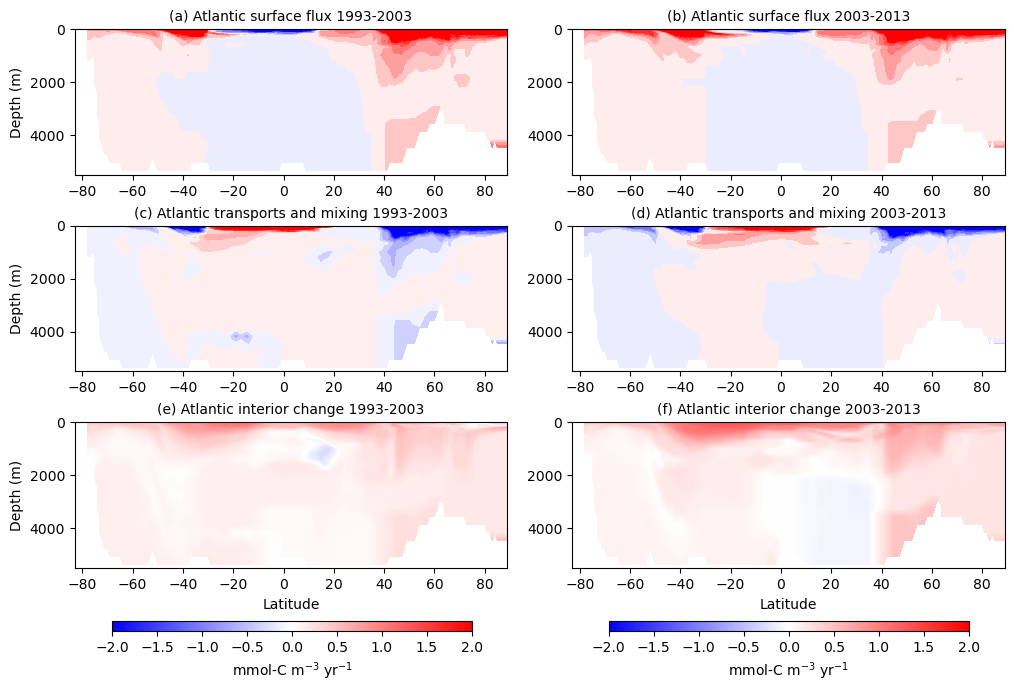

In [31]:
# Plot Atlantic budget

fig, axes = plt.subplots(3,2,figsize=(12,7))

plt.subplots_adjust(wspace=0.15, hspace=0.35)

fs=10
ncols=100
ylims = (5500, 0)
#ylims = (1500, 0)
lw = 0.5
#levels = (26.5,27.1)
Tlevels = np.arange(-2,30,2)
Tlevels_lab = (0,4,8,12,16,20)
#Slevels = np.round(np.arange(32,37,0.3),1)
#Slevels_lab = (33.8,34.1,34.4,34.7,35.0,35.3,35.6)
alpha=0.3

minv, maxv = -2, 2

# Surface flux

#axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_p1+adj_p1)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p1)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[0,0].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[0,0].set_title('(a) Atlantic surface flux ' + mid_early_p1 + '-' + mid_late_p1, fontsize=fs)
axes[0,0].invert_yaxis()
axes[0,0].set_ylim(ylims)

#axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_p2+adj_p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[0,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[0,1].set_title('(b) Atlantic surface flux ' + mid_early_p2 + '-' + mid_late_p2, fontsize=fs)
axes[0,1].invert_yaxis()
axes[0,1].set_ylim(ylims)

# Transports and mixing

axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p1*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[1,0].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[1,0].set_title('(c) Atlantic transports and mixing ' + mid_early_p1 + '-' + mid_late_p1, fontsize=fs)
axes[1,0].invert_yaxis()
axes[1,0].set_ylim(ylims)

axes[1,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p2*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[1,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[1,1].set_title('(d) Atlantic transports and mixing ' + mid_early_p2 + '-' + mid_late_p2, fontsize=fs)
axes[1,1].invert_yaxis()
axes[1,1].set_ylim(ylims)

# Total change = transports and mixing + surface flux

axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p1+prior_p1+adj_p1)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p1+OTM_p1)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[2,0].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[2,0].set_title('(e) Atlantic interior change ' + mid_early_p1 + '-' + mid_late_p1, fontsize=fs)
axes[2,0].invert_yaxis()
axes[2,0].set_ylim(ylims)

axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p2+prior_p2+adj_p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p2+OTM_p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[2,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[2,1].set_title('(f) Atlantic interior change ' + mid_early_p2 + '-' + mid_late_p2, fontsize=fs)
axes[2,1].invert_yaxis()
axes[2,1].set_ylim(ylims)


axes[2,0].set_xlabel('Latitude')
axes[2,1].set_xlabel('Latitude')

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')

cax = fig.add_axes([0.156, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

cax = fig.add_axes([0.570, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

/tmp/ipykernel_3513/3982207398.py:17: RuntimeWarning: Mean of empty slice
  axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p1)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3982207398.py:25: RuntimeWarning: Mean of empty slice
  axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p2)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3982207398.py:35: RuntimeWarning: Mean of empty slice
  axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p1*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3982207398.py:43: RuntimeWarning: Mean of empty slice
  axes[1,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p2*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/3982207398.py:54: RuntimeWarning: Mean of empty slice
  axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((m

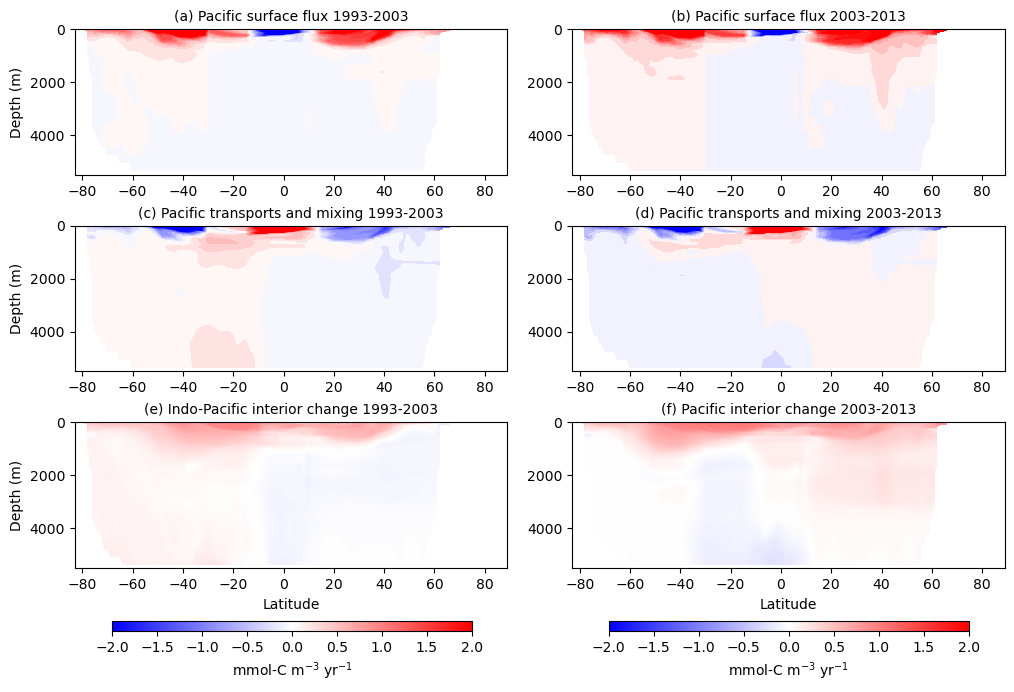

In [32]:
# Plot Pacific budget

fig, axes = plt.subplots(3,2,figsize=(12,7))

plt.subplots_adjust(wspace=0.15, hspace=0.35)

fs=10
ncols=100
ylims = (5500, 0)
#ylims = (1500, 0)

minv, maxv = -2, 2

# Surface flux

#axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_p1+adj_p1)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p1)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[0,0].contour(density.lat,density.depth,np.nanmean(T*mask_PAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[0,0].set_title('(a) Pacific surface flux ' + mid_early_p1 + '-' + mid_late_p1, fontsize=fs)
axes[0,0].invert_yaxis()
axes[0,0].invert_xaxis()
axes[0,0].set_ylim(ylims)

axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_p2)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[0,1].contour(density.lat,density.depth,np.nanmean(T*mask_PAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[0,1].set_title('(b) Pacific surface flux ' + mid_early_p2 + '-' + mid_late_p2, fontsize=fs)
axes[0,1].invert_yaxis()
axes[0,0].invert_xaxis()
axes[0,1].set_ylim(ylims)

# Transports and mixing

axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p1*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[1,0].contour(density.lat,density.depth,np.nanmean(T*mask_PAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[1,0].set_title('(c) Pacific transports and mixing ' + mid_early_p1 + '-' + mid_late_p1, fontsize=fs)
axes[1,0].invert_yaxis()
axes[0,0].invert_xaxis()
axes[1,0].set_ylim(ylims)

axes[1,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_p2*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[1,1].contour(density.lat,density.depth,np.nanmean(T*mask_PAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[1,1].set_title('(d) Pacific transports and mixing ' + mid_early_p2 + '-' + mid_late_p2, fontsize=fs)
axes[1,1].invert_yaxis()
axes[0,0].invert_xaxis()
axes[1,1].set_ylim(ylims)

# Total change = transports and mixing + surface flux

#axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p1+prior_p1+adj_p1)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p1+OTM_p1)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[2,0].contour(density.lat,density.depth,np.nanmean(T*mask_PAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[2,0].set_title('(e) Indo-Pacific interior change ' + mid_early_p1 + '-' + mid_late_p1, fontsize=fs)
axes[2,0].invert_yaxis()
axes[0,0].invert_xaxis()
axes[2,0].set_ylim(ylims)

#axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p2+prior_p2+adj_p2)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_p2+OTM_p2)*mask_PAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
#cs = axes[2,1].contour(density.lat,density.depth,np.nanmean(T*mask_PAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
#plt.clabel(cs,Tlevels_lab)
axes[2,1].set_title('(f) Pacific interior change ' + mid_early_p2 + '-' + mid_late_p2, fontsize=fs)
axes[2,1].invert_yaxis()
axes[0,0].invert_xaxis()
axes[2,1].set_ylim(ylims)


axes[2,0].set_xlabel('Latitude')
axes[2,1].set_xlabel('Latitude')

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')

cax = fig.add_axes([0.156, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

cax = fig.add_axes([0.570, 0.02, 0.3, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$',fontsize=fs)

/tmp/ipykernel_3513/2685474123.py:25: RuntimeWarning: Mean of empty slice
  axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/2685474123.py:26: RuntimeWarning: Mean of empty slice
  cs = axes[0,0].contour(T.lat,T.depth,np.nanmean(T*mask_INDPAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
/tmp/ipykernel_3513/2685474123.py:34: RuntimeWarning: Mean of empty slice
  axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_3513/2685474123.py:35: RuntimeWarning: Mean of empty slice
  cs = axes[0,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
/tmp/ipykernel_3513/2685474123.py:44: RuntimeWarning: Mean of empty slice
  axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1

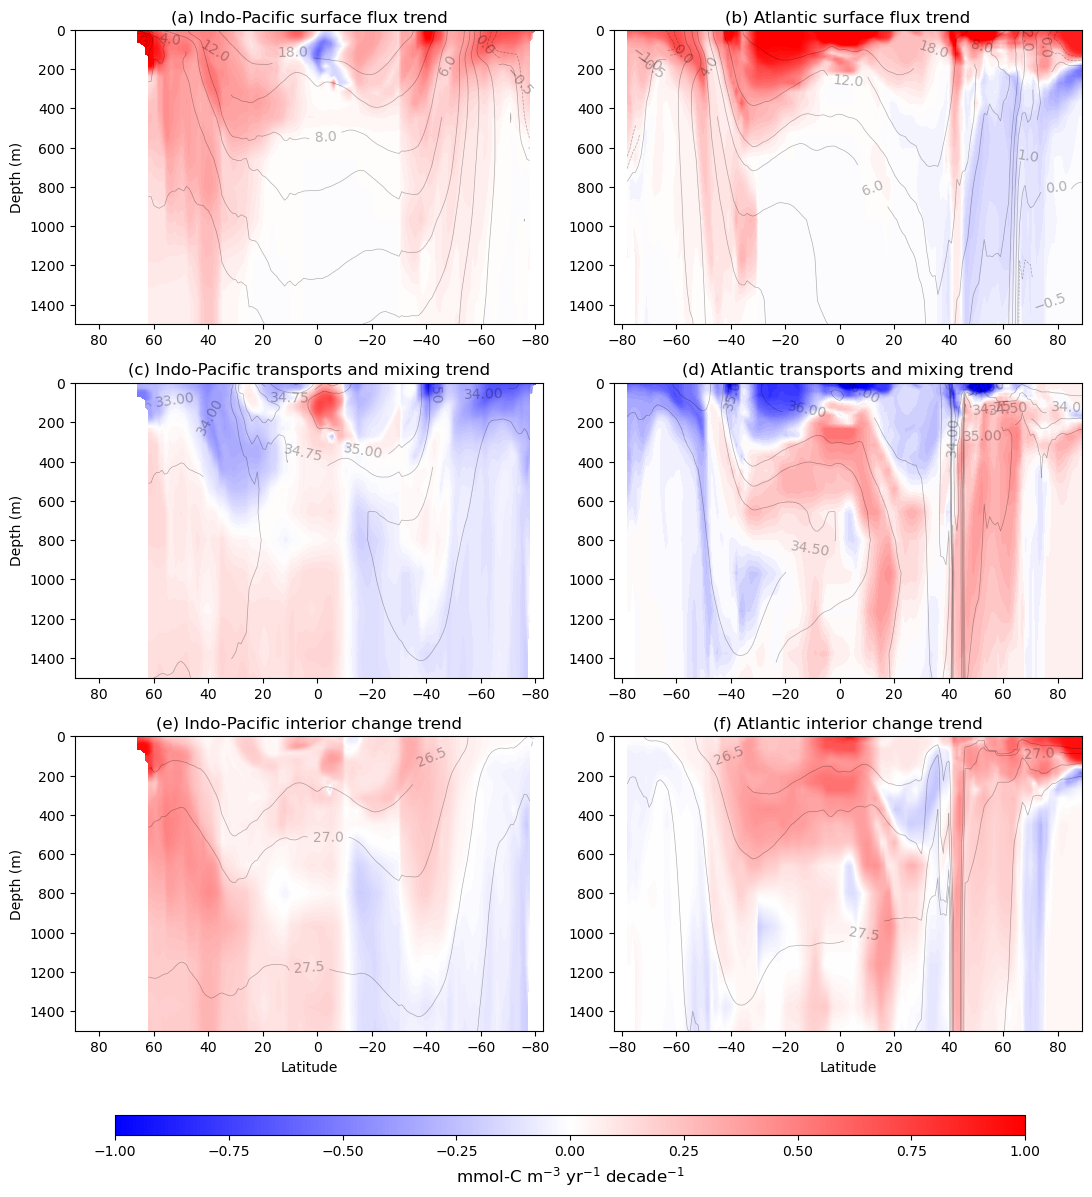

In [33]:
# Plot p1p2 budget trends Atlantic and Indo-Pacific (top layer)

fig, axes = plt.subplots(3,2,figsize=(13,13))

plt.subplots_adjust(wspace=0.15, hspace=0.2)

fs=12
ncols=100
ylims = (1500, 0)

Tlevels = (-1,-0.5,0,1,2,3,4,6,8,12,18)
Slevels = (33,34,34.5,34.75,35,36)
dlevels = (26.5,27,27.5,27.8)


alpha=0.3



minv, maxv = -1, 1

# Surface flux

#axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[0,0].contour(T.lat,T.depth,np.nanmean(T*mask_INDPAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Tlevels)
axes[0,0].set_title('(a) Indo-Pacific surface flux trend', fontsize=fs)
axes[0,0].invert_yaxis()
axes[0,0].invert_xaxis()
axes[0,0].set_ylim(ylims)

#axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[0,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Tlevels)
axes[0,1].set_title('(b) Atlantic surface flux trend', fontsize=fs)
axes[0,1].invert_yaxis()
axes[0,1].set_ylim(ylims)


# Transports and mixing

axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[1,0].contour(S.lat,S.depth,np.nanmean(S*mask_INDPAC,axis=2), Slevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Slevels)
axes[1,0].set_title('(c) Indo-Pacific transports and mixing trend', fontsize=fs)
axes[1,0].invert_yaxis()
axes[1,0].invert_xaxis()
axes[1,0].set_ylim(ylims)

axes[1,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[1,1].contour(S.lat,S.depth,np.nanmean(S*mask_ATL,axis=2), Slevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Slevels)
axes[1,1].set_title('(d) Atlantic transports and mixing trend', fontsize=fs)
axes[1,1].invert_yaxis()
axes[1,1].set_ylim(ylims)


# Total change = transports and mixing + surface flux

#axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+prior_trend_p1p2+adj_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[2,0].contour(density.lat,density.depth,np.nanmean(density*mask_INDPAC,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)
axes[2,0].set_title('(e) Indo-Pacific interior change trend', fontsize=fs)
axes[2,0].invert_yaxis()
axes[2,0].invert_xaxis()
axes[2,0].set_ylim(ylims)

#axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+prior_trend_p1p2+adj_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[2,1].contour(density.lat,density.depth,np.nanmean(density*mask_ATL,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)

axes[2,1].set_title('(f) Atlantic interior change trend', fontsize=fs)
axes[2,1].invert_yaxis()
axes[2,1].set_ylim(ylims)

axes[2,0].set_xlabel('Latitude')
axes[2,1].set_xlabel('Latitude')

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')


cax = fig.add_axes([0.156, 0.03, 0.7, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$ decade$^{-1}$',fontsize=fs)

plt.savefig('carbon_budget_remapped_' + Cdef + '_1500m.png', bbox_inches='tight', dpi=300, transparent=True)


/tmp/ipykernel_623/3796432705.py:22: RuntimeWarning: Mean of empty slice
  axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_623/3796432705.py:23: RuntimeWarning: Mean of empty slice
  cs = axes[0,0].contour(T.lat,T.depth,np.nanmean(T*mask_INDPAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
/tmp/ipykernel_623/3796432705.py:31: RuntimeWarning: Mean of empty slice
  axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_623/3796432705.py:32: RuntimeWarning: Mean of empty slice
  cs = axes[0,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
/tmp/ipykernel_623/3796432705.py:41: RuntimeWarning: Mean of empty slice
  axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*ma

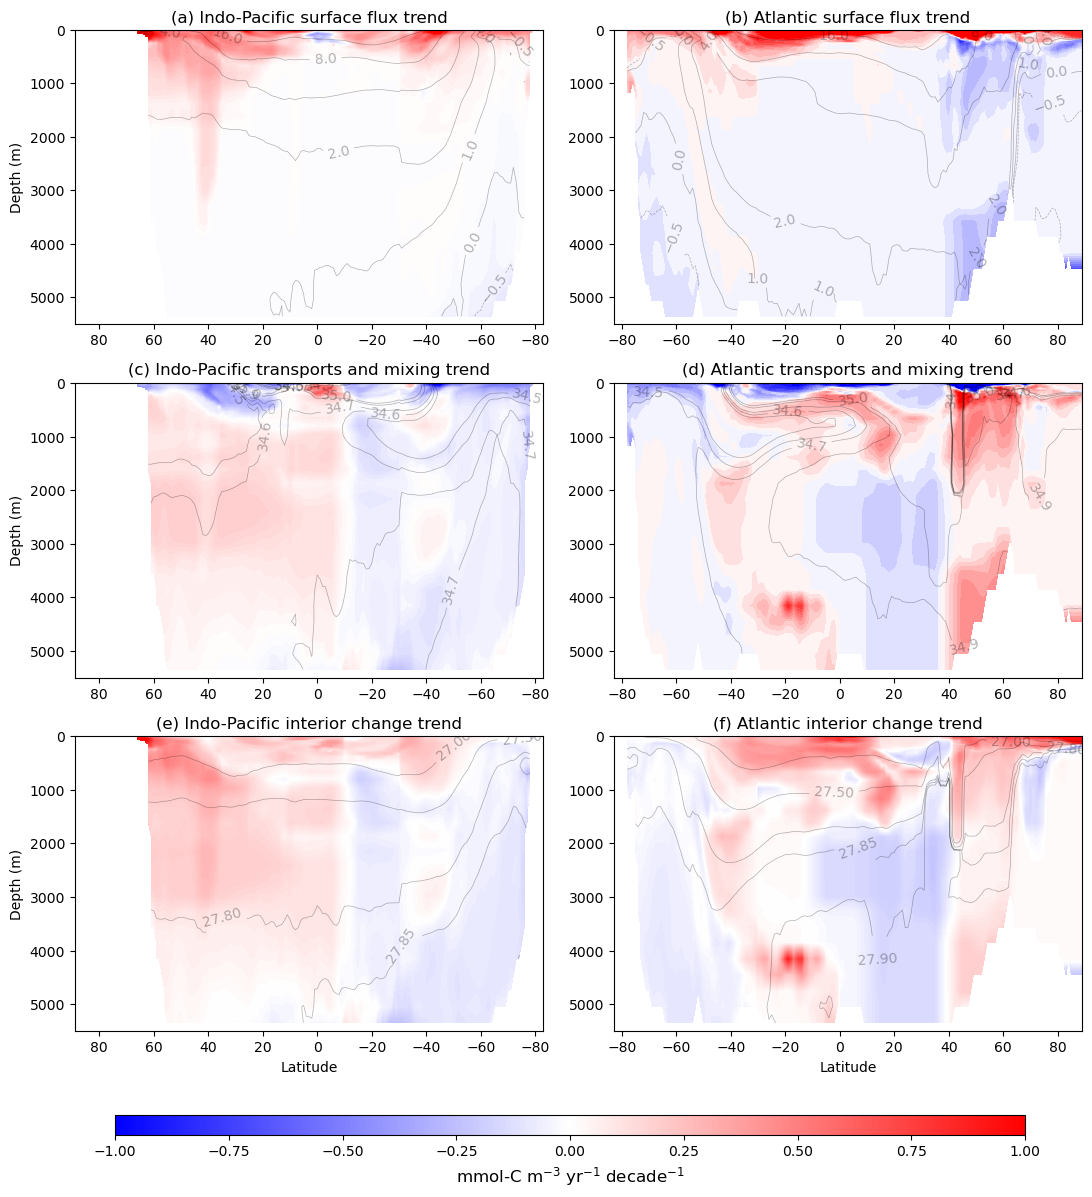

In [17]:
# Plot p1p2 budget trends Atlantic and Indo-Pacific (full depth)

fig, axes = plt.subplots(3,2,figsize=(13,13))

plt.subplots_adjust(wspace=0.15, hspace=0.2)

fs=12
ncols=100
ylims = (5500, 0)

Tlevels = (-0.5,0,1,2,4,8,16)
Slevels = (34.5,34.6,34.7,34.9,35)
dlevels = (27,27.5,27.8,27.85,27.9)
alpha=0.3


minv, maxv = -1, 1

# Surface flux

#axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[0,0].contour(T.lat,T.depth,np.nanmean(T*mask_INDPAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Tlevels)
axes[0,0].set_title('(a) Indo-Pacific surface flux trend', fontsize=fs)
axes[0,0].invert_yaxis()
axes[0,0].invert_xaxis()
axes[0,0].set_ylim(ylims)

#axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[0,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Tlevels)
axes[0,1].set_title('(b) Atlantic surface flux trend', fontsize=fs)
axes[0,1].invert_yaxis()
axes[0,1].set_ylim(ylims)


# Transports and mixing

axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[1,0].contour(S.lat,S.depth,np.nanmean(S*mask_INDPAC,axis=2), Slevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Slevels)
axes[1,0].set_title('(c) Indo-Pacific transports and mixing trend', fontsize=fs)
axes[1,0].invert_yaxis()
axes[1,0].invert_xaxis()
axes[1,0].set_ylim(ylims)

axes[1,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[1,1].contour(S.lat,S.depth,np.nanmean(S*mask_ATL,axis=2), Slevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Slevels)
axes[1,1].set_title('(d) Atlantic transports and mixing trend', fontsize=fs)
axes[1,1].invert_yaxis()
axes[1,1].set_ylim(ylims)


# Total change = transports and mixing + surface flux

#axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+prior_trend_p1p2+adj_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[2,0].contour(density.lat,density.depth,np.nanmean(density*mask_INDPAC,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)
axes[2,0].set_title('(e) Indo-Pacific interior change trend', fontsize=fs)
axes[2,0].invert_yaxis()
axes[2,0].invert_xaxis()
axes[2,0].set_ylim(ylims)

#axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+prior_trend_p1p2+adj_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[2,1].contour(density.lat,density.depth,np.nanmean(density*mask_ATL,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)
axes[2,1].set_title('(f) Atlantic interior change trend', fontsize=fs)
axes[2,1].invert_yaxis()
axes[2,1].set_ylim(ylims)



axes[2,0].set_xlabel('Latitude')
axes[2,1].set_xlabel('Latitude')

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')


cax = fig.add_axes([0.156, 0.03, 0.7, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$ decade$^{-1}$',fontsize=fs)

plt.savefig('carbon_budget_remapped_' + Cdef + '_5500m.png', bbox_inches='tight', dpi=300, transparent=True)


/tmp/ipykernel_623/2330407795.py:22: RuntimeWarning: Mean of empty slice
  axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_623/2330407795.py:23: RuntimeWarning: Mean of empty slice
  cs = axes[0,0].contour(T.lat,T.depth,np.nanmean(T*mask_INDPAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
/tmp/ipykernel_623/2330407795.py:31: RuntimeWarning: Mean of empty slice
  axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
/tmp/ipykernel_623/2330407795.py:32: RuntimeWarning: Mean of empty slice
  cs = axes[0,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
/tmp/ipykernel_623/2330407795.py:41: RuntimeWarning: Mean of empty slice
  axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*ma

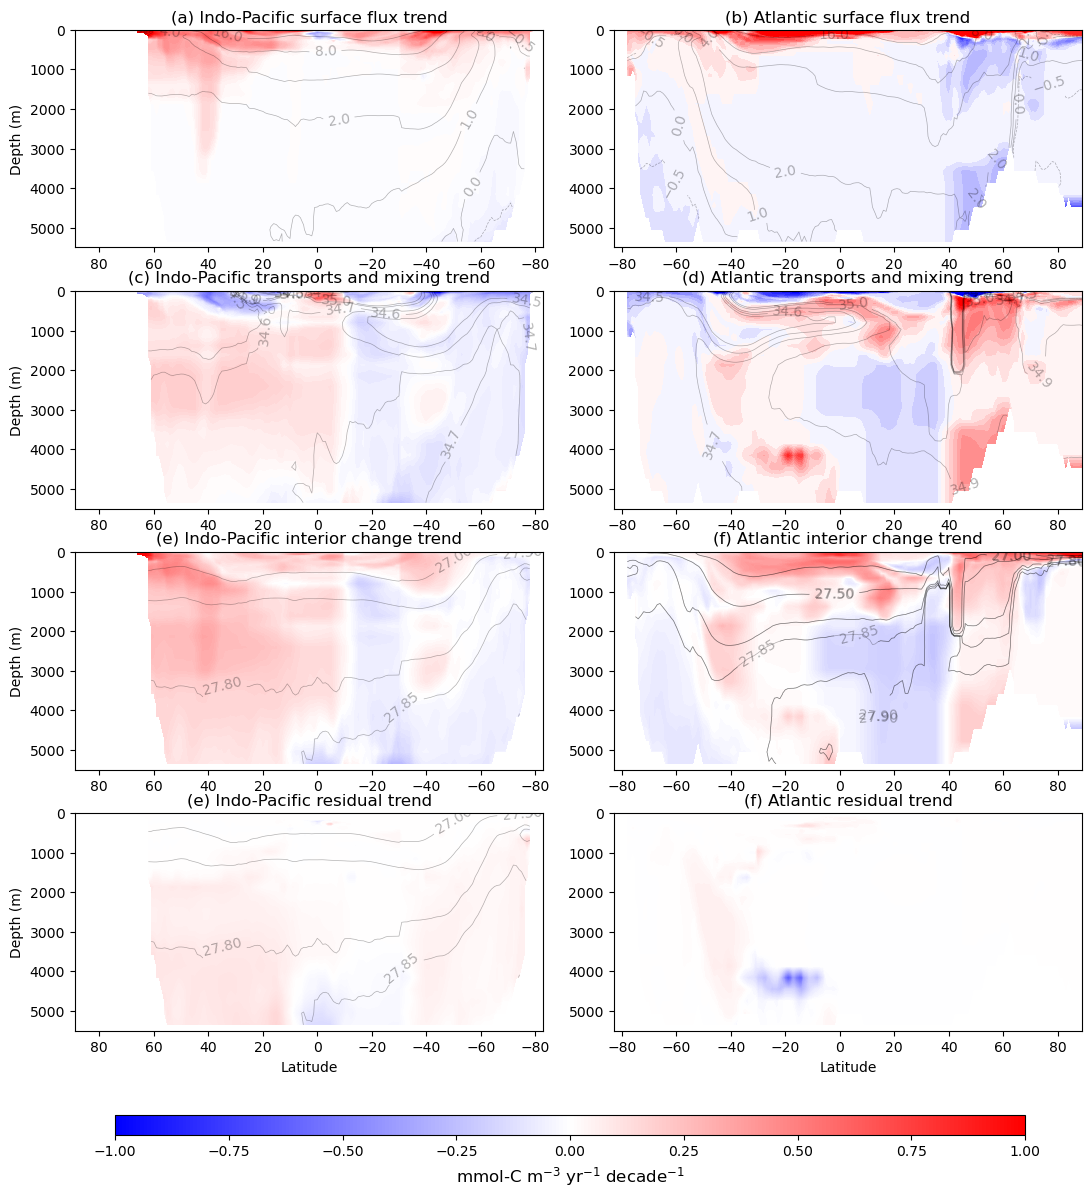

In [18]:
# Plot p1p2 budget trends Atlantic and Indo-Pacific (full depth with residual)

fig, axes = plt.subplots(4,2,figsize=(13,13))

plt.subplots_adjust(wspace=0.15, hspace=0.2)

fs=12
ncols=100
ylims = (5500, 0)

Tlevels = (-0.5,0,1,2,4,8,16)
Slevels = (34.5,34.6,34.7,34.9,35)
dlevels = (27,27.5,27.8,27.85,27.9)
alpha=0.3


minv, maxv = -1, 1

# Surface flux

#axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[0,0].contour(T.lat,T.depth,np.nanmean(T*mask_INDPAC,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Tlevels)
axes[0,0].set_title('(a) Indo-Pacific surface flux trend', fontsize=fs)
axes[0,0].invert_yaxis()
axes[0,0].invert_xaxis()
axes[0,0].set_ylim(ylims)

#axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
axes[0,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[0,1].contour(T.lat,T.depth,np.nanmean(T*mask_ATL,axis=2), Tlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Tlevels)
axes[0,1].set_title('(b) Atlantic surface flux trend', fontsize=fs)
axes[0,1].invert_yaxis()
axes[0,1].set_ylim(ylims)


# Transports and mixing

axes[1,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[1,0].contour(S.lat,S.depth,np.nanmean(S*mask_INDPAC,axis=2), Slevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Slevels)
axes[1,0].set_title('(c) Indo-Pacific transports and mixing trend', fontsize=fs)
axes[1,0].invert_yaxis()
axes[1,0].invert_xaxis()
axes[1,0].set_ylim(ylims)

axes[1,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean(mix_trend_p1p2*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[1,1].contour(S.lat,S.depth,np.nanmean(S*mask_ATL,axis=2), Slevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,Slevels)
axes[1,1].set_title('(d) Atlantic transports and mixing trend', fontsize=fs)
axes[1,1].invert_yaxis()
axes[1,1].set_ylim(ylims)


# Total change = transports and mixing + surface flux

axes[2,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+prior_trend_p1p2+adj_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[2,0].contour(density.lat,density.depth,np.nanmean(density*mask_INDPAC,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)
axes[2,0].set_title('(e) Indo-Pacific interior change trend', fontsize=fs)
axes[2,0].invert_yaxis()
axes[2,0].invert_xaxis()
axes[2,0].set_ylim(ylims)

axes[2,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((mix_trend_p1p2+prior_trend_p1p2+adj_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[2,1].contour(density.lat,density.depth,np.nanmean(density*mask_ATL,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)
axes[2,1].set_title('(f) Atlantic interior change trend', fontsize=fs)
axes[2,1].invert_yaxis()
axes[2,1].set_ylim(ylims)

# Residual

axes[3,0].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2-OTM_trend_p1p2)*mask_INDPAC,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[3,0].contour(density.lat,density.depth,np.nanmean(density*mask_INDPAC,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)
axes[3,0].set_title('(e) Indo-Pacific residual trend', fontsize=fs)
axes[3,0].invert_yaxis()
axes[3,0].invert_xaxis()
axes[3,0].set_ylim(ylims)

axes[3,1].contourf(OTM_remapped.lat,OTM_remapped.depth,np.nanmean((prior_trend_p1p2+adj_trend_p1p2-OTM_trend_p1p2)*mask_ATL,axis=2), ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
cs = axes[2,1].contour(density.lat,density.depth,np.nanmean(density*mask_ATL,axis=2), dlevels, colors='black', alpha=alpha, linewidths=lw)
plt.clabel(cs,dlevels)
axes[3,1].set_title('(f) Atlantic residual trend', fontsize=fs)
axes[3,1].invert_yaxis()
axes[3,1].set_ylim(ylims)


axes[3,0].set_xlabel('Latitude')
axes[3,1].set_xlabel('Latitude')

axes[0,0].set_ylabel('Depth (m)')
axes[1,0].set_ylabel('Depth (m)')
axes[2,0].set_ylabel('Depth (m)')
axes[3,0].set_ylabel('Depth (m)')

cax = fig.add_axes([0.156, 0.03, 0.7, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$ decade$^{-1}$',fontsize=fs)

plt.savefig('carbon_budget_remapped_withres' + Cdef + '_5500m.png', bbox_inches='tight', dpi=300, transparent=True)


/tmp/ipykernel_623/1358315126.py:41: RuntimeWarning: Mean of empty slice
  plot_subplot(axes[0, 0], np.nanmean((prior_trend_p1p2 + adj_trend_p1p2) * mask_INDPAC, axis=2),
/tmp/ipykernel_623/1358315126.py:42: RuntimeWarning: Mean of empty slice
  np.nanmean((prior_trend_p1p2 + adj_trend_p1p2) * mask_INDPAC, axis=2), '(a) Indo-Pacific surface flux trend')


TypeError: Length of y (100) must match number of rows in z (42)

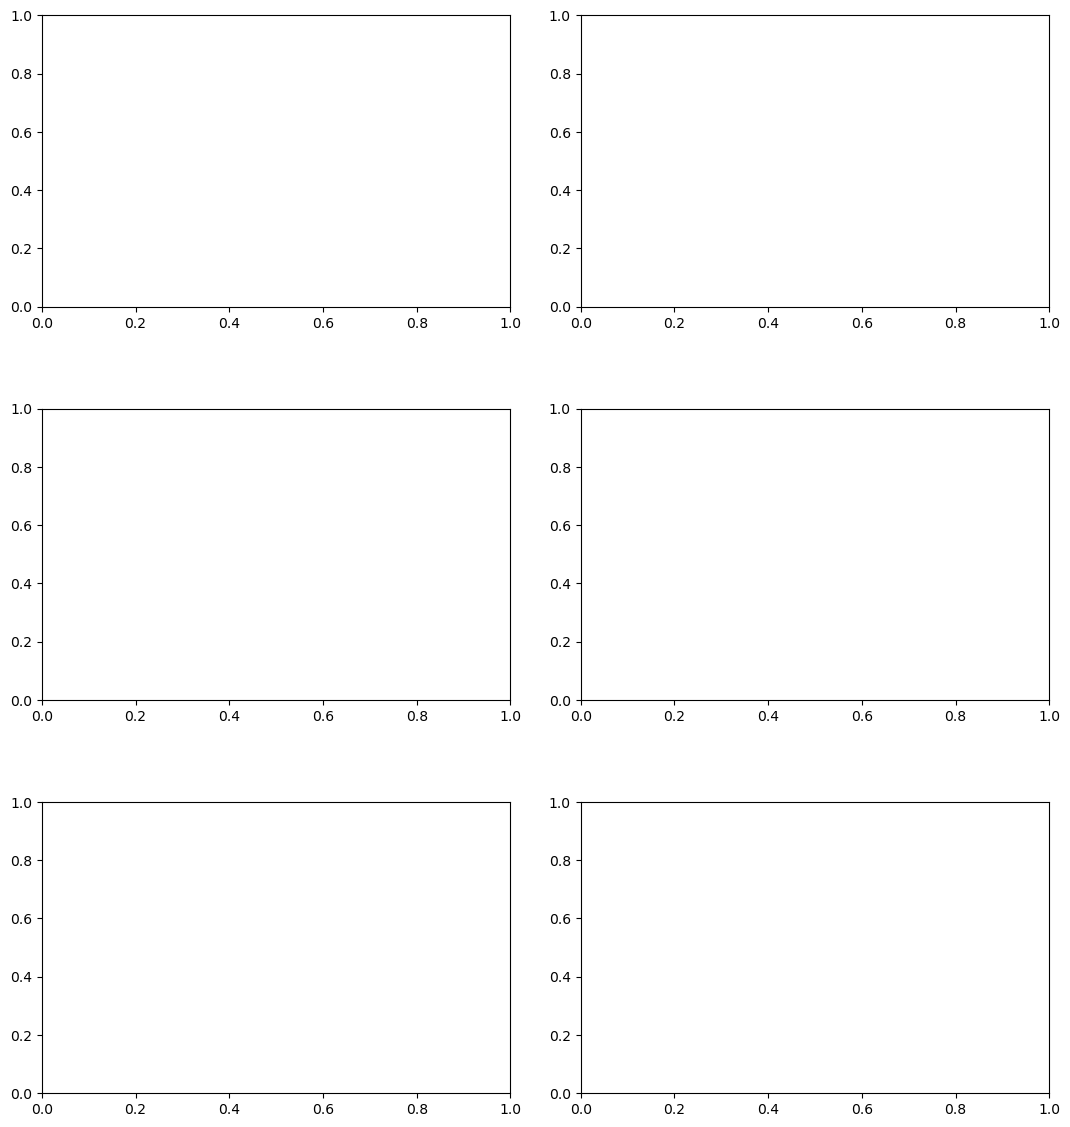

In [19]:
# Attempt to get ChatGPT to combined the top 1000m and full-depth plots (unsucessful)

import matplotlib.pyplot as plt
import numpy as np

# Create the figure and axis setup
fig, axes = plt.subplots(3, 2, figsize=(13, 14))
plt.subplots_adjust(wspace=0.15, hspace=0.35)

# Plot parameters
fs = 12
ncols = 100
Tlevels = np.arange(-2, 30, 2)
Tlevels_lab = (0, 4, 8, 12, 16, 20)
alpha = 0.3
minv, maxv = -1, 1

# Custom depth ranges
depth_shallow = np.linspace(0, 1000, 100)
depth_deep = np.linspace(1000, 5500, 100)

# Function to plot both shallow and deep slabs in a single subplot with stretched scaling
def plot_subplot(ax, shallow_data, deep_data, title):
    # Plot shallow slab (0-1000m), scaled to fill the top half (0 to 0.5 on y-axis)
    cs_shallow = ax.contourf(OTM_remapped.lat, depth_shallow / 2, shallow_data, ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
    cs_shallow_contour = ax.contour(density.lat, depth_shallow / 2, Tlevels, colors='black', alpha=alpha)
    ax.clabel(cs_shallow_contour, Tlevels_lab, inline=True, fontsize=8)
    
    # Plot deep slab (1000-5500m), scaled to fill the bottom half (0.5 to 1 on y-axis)
    cs_deep = ax.contourf(OTM_remapped.lat, 0.5 + (depth_deep - 1000) / (2 * 4500), deep_data, ncols, vmin=minv, vmax=maxv, cmap=plt.cm.bwr)
    cs_deep_contour = ax.contour(density.lat, 0.5 + (depth_deep - 1000) / (2 * 4500), Tlevels, colors='black', alpha=alpha)
    ax.clabel(cs_deep_contour, Tlevels_lab, inline=True, fontsize=8)
    
    # Set titles and inverted y-axis for depth
    ax.set_title(title, fontsize=fs)
    ax.set_ylim(1, 0)  # Inverted y-axis to show depth from 0 to 5500m
    ax.set_yticks([0, 0.5, 1])
    ax.set_yticklabels(['5500', '1000', '0'])  # Custom depth labels

# Apply custom plotting to each subplot with the correct data
plot_subplot(axes[0, 0], np.nanmean((prior_trend_p1p2 + adj_trend_p1p2) * mask_INDPAC, axis=2),
             np.nanmean((prior_trend_p1p2 + adj_trend_p1p2) * mask_INDPAC, axis=2), '(a) Indo-Pacific surface flux trend')
plot_subplot(axes[0, 1], np.nanmean((prior_trend_p1p2 + adj_trend_p1p2) * mask_ATL, axis=2),
             np.nanmean((prior_trend_p1p2 + adj_trend_p1p2) * mask_ATL, axis=2), '(b) Atlantic surface flux trend')
plot_subplot(axes[1, 0], np.nanmean(mix_trend_p1p2 * mask_INDPAC, axis=2),
             np.nanmean(mix_trend_p1p2 * mask_INDPAC, axis=2), '(c) Indo-Pacific transports and mixing trend')
plot_subplot(axes[1, 1], np.nanmean(mix_trend_p1p2 * mask_ATL, axis=2),
             np.nanmean(mix_trend_p1p2 * mask_ATL, axis=2), '(d) Atlantic transports and mixing trend')
plot_subplot(axes[2, 0], np.nanmean((mix_trend_p1p2 + prior_trend_p1p2 + adj_trend_p1p2) * mask_INDPAC, axis=2),
             np.nanmean((mix_trend_p1p2 + prior_trend_p1p2 + adj_trend_p1p2) * mask_INDPAC, axis=2), '(e) Indo-Pacific interior change trend')
plot_subplot(axes[2, 1], np.nanmean((mix_trend_p1p2 + prior_trend_p1p2 + adj_trend_p1p2) * mask_ATL, axis=2),
             np.nanmean((mix_trend_p1p2 + prior_trend_p1p2 + adj_trend_p1p2) * mask_ATL, axis=2), '(f) Atlantic interior change trend')

# Set x and y labels
axes[2, 0].set_xlabel('Latitude')
axes[2, 1].set_xlabel('Latitude')
axes[0, 0].set_ylabel('Depth (m)')
axes[1, 0].set_ylabel('Depth (m)')
axes[2, 0].set_ylabel('Depth (m)')

# Colorbar
cax = fig.add_axes([0.156, 0.02, 0.7, 0.015])
m = plt.cm.ScalarMappable(cmap=plt.cm.bwr)
m.set_clim(minv, maxv)
cbar = fig.colorbar(m, cax=cax, orientation='horizontal')
cbar.set_label('mmol-C m$^{-3}$ yr$^{-1}$', fontsize=fs)

plt.show()


### Zonally integrated budgets and budget trends

In [ ]:
# Global budget and split by Atlantic/Pacific

mmol2Pg = 12/10**18

fig, axes = plt.subplots(3,3,figsize=(13,16))
plt.subplots_adjust(wspace=0.35, hspace=0.3)
lw = 1

## Global

xlims = ((-0.1,0.1))
xlims2 = ((-0.05,0.05))

# P1

axes[0,0].plot(mmol2Pg*np.nansum((mix_p1)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[0,0].plot(mmol2Pg*np.nansum((prior_p1+adj_p1)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[0,0].plot(mmol2Pg*np.nansum((prior_p1+adj_p1+mix_p1)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,0].plot(mmol2Pg*np.nansum((OTM_p1)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,0].plot(mmol2Pg*np.nansum((OTM_p1+mix_p1)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,0].plot(mmol2Pg*np.nansum((prior_p1)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[0,0].set_title('(a) Global budget P1 (' + mid_early_p1 + '-' + mid_late_p1 +')', fontsize=fs)
axes[0,0].tick_params(axis='x', labelsize=fs)
axes[0,0].tick_params(axis='y', labelsize=fs)
axes[0,0].set_xlim(xlims)
axes[0,0].grid()

# P2

axes[0,1].plot(mmol2Pg*np.nansum((mix_p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[0,1].plot(mmol2Pg*np.nansum((prior_p2+adj_p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[0,1].plot(mmol2Pg*np.nansum((prior_p2+adj_p2+mix_p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,1].plot(mmol2Pg*np.nansum((OTM_p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,1].plot(mmol2Pg*np.nansum((OTM_p2+mix_p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,1].plot(mmol2Pg*np.nansum((prior_p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[0,1].set_title('(b) Global budget P2 (' + mid_early_p2 + '-' + mid_late_p2 +')', fontsize=fs)
axes[0,1].tick_params(axis='x', labelsize=fs)
axes[0,1].tick_params(axis='y', labelsize=fs)
axes[0,1].set_xlim(xlims)
axes[0,1].grid()

# P1 to P2

axes[0,2].plot(mmol2Pg*np.nansum((mix_trend_p1p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[0,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2+adj_trend_p1p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[0,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2+adj_trend_p1p2+mix_trend_p1p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,2].plot(mmol2Pg*np.nansum((OTM_trend_p1p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,2].plot(mmol2Pg*np.nansum((OTM_trend_p1p2+mix_trend_p1p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[0,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[0,2].legend(('Transport','Flux','Change','Flux prior'))
axes[0,2].set_title('(c) Global budget trend P1 to P2', fontsize=fs)
axes[0,2].tick_params(axis='x', labelsize=fs)
axes[0,2].tick_params(axis='y', labelsize=fs)
axes[0,2].set_xlim(xlims2)
axes[0,2].grid()

## Pacific

xlims = ((-0.1,0.1))
xlims2 = ((-0.05,0.05))

# P1

axes[1,0].plot(mmol2Pg*np.nansum((mix_p1)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[1,0].plot(mmol2Pg*np.nansum((prior_p1+adj_p1)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[1,0].plot(mmol2Pg*np.nansum((prior_p1+adj_p1+mix_p1)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,0].plot(mmol2Pg*np.nansum((OTM_p1)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,0].plot(mmol2Pg*np.nansum((OTM_p1+mix_p1)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,0].plot(mmol2Pg*np.nansum((prior_p1)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[1,0].set_title('(d) Indo-Pacific budget P1 (' + mid_early_p1 + '-' + mid_late_p1 +')', fontsize=fs)
axes[1,0].tick_params(axis='x', labelsize=fs)
axes[1,0].tick_params(axis='y', labelsize=fs)
axes[1,0].set_xlim(xlims)
axes[1,0].grid()

# P2

axes[1,1].plot(mmol2Pg*np.nansum((mix_p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[1,1].plot(mmol2Pg*np.nansum((prior_p2+adj_p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[1,1].plot(mmol2Pg*np.nansum((prior_p2+adj_p2+mix_p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,1].plot(mmol2Pg*np.nansum((OTM_p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,1].plot(mmol2Pg*np.nansum((OTM_p2+mix_p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,1].plot(mmol2Pg*np.nansum((prior_p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[1,1].set_title('(e) Indo-Pacific budget P2 (' + mid_early_p2 + '-' + mid_late_p2 +')', fontsize=fs)
axes[1,1].tick_params(axis='x', labelsize=fs)
axes[1,1].tick_params(axis='y', labelsize=fs)
axes[1,1].set_xlim(xlims)
axes[1,1].grid()

# P1 to P2

axes[1,2].plot(mmol2Pg*np.nansum((mix_trend_p1p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[1,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2+adj_trend_p1p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[1,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2+adj_trend_p1p2+mix_trend_p1p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,2].plot(mmol2Pg*np.nansum((OTM_trend_p1p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,2].plot(mmol2Pg*np.nansum((OTM_trend_p1p2+mix_trend_p1p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[1,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[1,2].legend(('Transport','Flux','Change','Flux prior'))
axes[1,2].set_title('(f) Indo-Pacific budget trend P1 to P2', fontsize=fs)
axes[1,2].tick_params(axis='x', labelsize=fs)
axes[1,2].tick_params(axis='y', labelsize=fs)
axes[1,2].set_xlim(xlims2)
axes[1,2].grid()

# Atlantic

xlims = ((-0.04,0.04))
xlims2 = ((-0.02,0.02))

# P1

axes[2,0].plot(mmol2Pg*np.nansum((mix_p1)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[2,0].plot(mmol2Pg*np.nansum((prior_p1+adj_p1)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[2,0].plot(mmol2Pg*np.nansum((prior_p1+adj_p1+mix_p1)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,0].plot(mmol2Pg*np.nansum((OTM_p1)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,0].plot(mmol2Pg*np.nansum((OTM_p1+mix_p1)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,0].plot(mmol2Pg*np.nansum((prior_p1)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[2,0].set_title('(g) Atlantic budget P1 (' + mid_early_p1 + '-' + mid_late_p1 +')', fontsize=fs)
axes[2,0].tick_params(axis='x', labelsize=fs)
axes[2,0].tick_params(axis='y', labelsize=fs)
axes[2,0].set_xlim(xlims)
axes[2,0].grid()

# P2

axes[2,1].plot(mmol2Pg*np.nansum((mix_p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[2,1].plot(mmol2Pg*np.nansum((prior_p2+adj_p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[2,1].plot(mmol2Pg*np.nansum((prior_p2+adj_p2+mix_p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,1].plot(mmol2Pg*np.nansum((OTM_p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,1].plot(mmol2Pg*np.nansum((OTM_p2+mix_p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,1].plot(mmol2Pg*np.nansum((prior_p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[2,1].set_title('(h) Atlantic budget P2 (' + mid_early_p2 + '-' + mid_late_p2 + ')', fontsize=fs)
axes[2,1].tick_params(axis='x', labelsize=fs)
axes[2,1].tick_params(axis='y', labelsize=fs)
axes[2,1].set_xlim(xlims)
axes[2,1].grid()

# P1 to P2

axes[2,2].plot(mmol2Pg*np.nansum((mix_trend_p1p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[2,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2+adj_trend_p1p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
#axes[2,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2+adj_trend_p1p2+mix_trend_p1p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,2].plot(mmol2Pg*np.nansum((OTM_trend_p1p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,2].plot(mmol2Pg*np.nansum((OTM_trend_p1p2+mix_trend_p1p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat)
axes[2,2].plot(mmol2Pg*np.nansum((prior_trend_p1p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2)),OTM_remapped.lat,'--',color='#ff7f0e',linewidth=lw)
axes[2,2].legend(('Transport','Flux','Change','Flux prior'))
axes[2,2].set_title('(i) Atlantic budget trend P1 to P2', fontsize=fs)
axes[2,2].tick_params(axis='x', labelsize=fs)
axes[2,2].tick_params(axis='y', labelsize=fs)
axes[2,2].set_xlim(xlims2)
axes[2,2].grid()



axes[0,0].set_xlabel('PgC yr$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[1,0].set_xlabel('PgC yr$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[2,0].set_xlabel('PgC yr$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[0,1].set_xlabel('PgC yr$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[1,1].set_xlabel('PgC yr$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[2,1].set_xlabel('PgC yr$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[0,2].set_xlabel('PgC yr$^{-1}$ decade$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[1,2].set_xlabel('PgC yr$^{-1}$ decade$^{-1}$ degree$^{-1}$', fontsize=fs)
axes[2,2].set_xlabel('PgC yr$^{-1}$ decade$^{-1}$ degree$^{-1}$', fontsize=fs)

axes[0,0].set_ylabel('Latitude', fontsize=fs)
axes[1,0].set_ylabel('Latitude', fontsize=fs)
axes[2,0].set_ylabel('Latitude', fontsize=fs)


plt.savefig('carbon_budget_zonalint_' + Cdef + '.png', bbox_inches='tight', dpi=300, transparent=True)

In [ ]:
# Cumulative meridional transports for comparison with validaton
# NOTE: I am not sure if the label of Northward transport is correct here

mmol2Pg = 12/10**18

fig, axes = plt.subplots(1,3,figsize=(13,6))
plt.subplots_adjust(wspace=0.35, hspace=0.3)
lw = 1

xlims = ((-1.5,1))
xlims2 = ((-1.5,1))

# P1

axes[0].plot(-mmol2Pg*np.cumsum(np.nansum((mix_p1)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'b')
axes[0].plot(-mmol2Pg*np.cumsum(np.nansum((mix_p1)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'g')
axes[0].plot(-mmol2Pg*np.cumsum(np.nansum((mix_p1)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'r')
axes[0].legend(('Global','Indo-Pacific','Atlantic'))
axes[0].set_title('(a) Northward transport P1 (' + mid_early_p1 + '-' + mid_late_p1 +')', fontsize=fs)
axes[0].tick_params(axis='x', labelsize=fs)
axes[0].tick_params(axis='y', labelsize=fs)
axes[0].set_xlim(xlims)
axes[0].grid()

# P2

axes[1].plot(-mmol2Pg*np.cumsum(np.nansum((mix_p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'b')
axes[1].plot(-mmol2Pg*np.cumsum(np.nansum((mix_p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'g')
axes[1].plot(-mmol2Pg*np.cumsum(np.nansum((mix_p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'r')
axes[1].legend(('Global','Indo-Pacific','Atlantic'))
axes[1].set_title('(b) Northward transport P2 (' + mid_early_p2 + '-' + mid_late_p2 +')', fontsize=fs)
axes[1].tick_params(axis='x', labelsize=fs)
axes[1].tick_params(axis='y', labelsize=fs)
axes[1].set_xlim(xlims)
axes[1].grid()

# P1 to P2

axes[2].plot(-mmol2Pg*np.cumsum(np.nansum((mix_trend_p1p2)*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'b')
axes[2].plot(-mmol2Pg*np.cumsum(np.nansum((mix_trend_p1p2)*mask_INDPAC*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'g')
axes[2].plot(-mmol2Pg*np.cumsum(np.nansum((mix_trend_p1p2)*mask_ATL*OTM_remapped.area*OTM_remapped.dz,axis=(0,2))),OTM_remapped.lat,'r')
axes[2].legend(('Global','Indo-Pacific','Atlantic'))
axes[2].set_title('(c) Transport trend P1 to P2', fontsize=fs)
axes[2].tick_params(axis='x', labelsize=fs)
axes[2].tick_params(axis='y', labelsize=fs)
axes[2].set_xlim(xlims2)
axes[2].grid()


axes[0].set_xlabel('PgC yr$^{-1}$', fontsize=fs)
axes[1].set_xlabel('PgC yr$^{-1}$', fontsize=fs)
axes[2].set_xlabel('PgC yr$^{-1}$ decade$^{-1}$', fontsize=fs)

axes[0].set_ylabel('Latitude', fontsize=fs)


plt.savefig('carbon_budget_cumzonalint_' + Cdef + '.png', bbox_inches='tight', dpi=300, transparent=True)